In [7]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter





from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
data=pd.read_csv('../Data/Data.csv')
label=pd.read_csv('../Data/Label.csv')

In [9]:
print(data.info())
print(label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447915 entries, 0 to 447914
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               447915 non-null  int64  
 1   Total Fwd Packet            447915 non-null  int64  
 2   Total Bwd packets           447915 non-null  int64  
 3   Total Length of Fwd Packet  447915 non-null  int64  
 4   Total Length of Bwd Packet  447915 non-null  int64  
 5   Fwd Packet Length Max       447915 non-null  int64  
 6   Fwd Packet Length Min       447915 non-null  int64  
 7   Fwd Packet Length Mean      447915 non-null  float64
 8   Fwd Packet Length Std       447915 non-null  float64
 9   Bwd Packet Length Max       447915 non-null  int64  
 10  Bwd Packet Length Min       447915 non-null  int64  
 11  Bwd Packet Length Mean      447915 non-null  float64
 12  Bwd Packet Length Std       447915 non-null  float64
 13  Flow Bytes/s  

In [10]:
print(data.head)
print(label.head)

<bound method NDFrame.head of         Flow Duration  Total Fwd Packet  Total Bwd packets  \
0              214392                 9                 21   
1             2376792                 9                  3   
2              131350                10                  3   
3              164796                 6                  3   
4              163418                 6                  3   
...               ...               ...                ...   
447910            348                 1                  2   
447911           1639                 4                  4   
447912            312                 1                  2   
447913            358                 1                  2   
447914            311                 1                  2   

        Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                              388                       24564   
1                              752                           0   
2                          

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, label['Label'], test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(358332, 76) (89583, 76) (358332,) (89583,)


In [13]:
print(X_train.info(), X_test.info(), y_train.info(), y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 358332 entries, 104799 to 121958
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               358332 non-null  int64  
 1   Total Fwd Packet            358332 non-null  int64  
 2   Total Bwd packets           358332 non-null  int64  
 3   Total Length of Fwd Packet  358332 non-null  int64  
 4   Total Length of Bwd Packet  358332 non-null  int64  
 5   Fwd Packet Length Max       358332 non-null  int64  
 6   Fwd Packet Length Min       358332 non-null  int64  
 7   Fwd Packet Length Mean      358332 non-null  float64
 8   Fwd Packet Length Std       358332 non-null  float64
 9   Bwd Packet Length Max       358332 non-null  int64  
 10  Bwd Packet Length Min       358332 non-null  int64  
 11  Bwd Packet Length Mean      358332 non-null  float64
 12  Bwd Packet Length Std       358332 non-null  float64
 13  Flow Bytes/s  

In [14]:
print("Missing values in  Data:")
print(data.isnull().sum())

Missing values in  Data:
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
                             ..
Active Min                    0
Idle Mean                     0
Idle Std                      0
Idle Max                      0
Idle Min                      0
Length: 76, dtype: int64


In [15]:
print("Missing values in  Data:")
print(label.isnull().sum())

Missing values in  Data:
Label    0
dtype: int64


In [16]:
print(X_train.describe(), X_test.describe(), y_train.describe(), y_test.describe())

       Flow Duration  Total Fwd Packet  Total Bwd packets  \
count   3.583320e+05     358332.000000      358332.000000   
mean    5.965464e+05         22.586163          27.156129   
std     4.880156e+06        128.750057         114.994688   
min     1.000000e+00          1.000000           0.000000   
25%     3.490000e+02          1.000000           2.000000   
50%     5.779500e+03          3.000000           2.000000   
75%     1.780708e+05         17.000000          15.000000   
max     1.199975e+08      19616.000000       11021.000000   

       Total Length of Fwd Packet  Total Length of Bwd Packet  \
count                3.583320e+05                3.583320e+05   
mean                 4.798193e+03                2.159995e+04   
std                  1.529527e+05                1.455858e+05   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  9.000000e+01                1.060000e+0

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
pca = PCA()  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

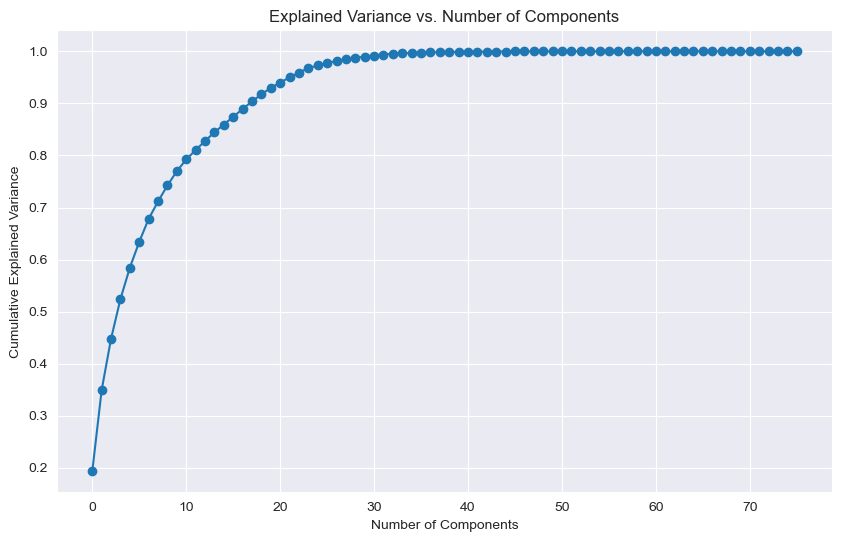

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [20]:
pca_95 = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)

In [ ]:
print(f"Original shape: {X_train.shape}, PCA shape: {X_train_pca_95.shape}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_95[:, 0], y=X_train_pca_95[:, 1], hue=y_train, palette='Set2')
plt.title('PCA - First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Original shape: (358332, 76), PCA shape: (358332, 23)


In [25]:
rf_classifier = RandomForestClassifier(random_state=42)


In [26]:

rf_classifier.fit(X_train_pca_95, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf_classifier.predict(X_test_pca_95)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9299


In [29]:
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=[f"Class {i}" for i in np.unique(y_test)])
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99     71701
     Class 1       0.36      0.35      0.36        68
     Class 2       0.78      0.43      0.56       104
     Class 3       0.58      0.28      0.38       916
     Class 4       0.73      0.78      0.76      6259
     Class 5       0.64      0.78      0.71      5849
     Class 6       0.79      0.66      0.72       867
     Class 7       0.75      0.69      0.72      3392
     Class 8       0.44      0.29      0.35       381
     Class 9       0.62      0.22      0.32        46

    accuracy                           0.93     89583
   macro avg       0.67      0.55      0.59     89583
weighted avg       0.93      0.93      0.93     89583



USING XGBOOST

In [6]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_pca_95, y_train)

NameError: name 'X_train_pca_95' is not defined

In [31]:
y_pred1 = xgb_classifier.predict(X_test_pca_95)

In [32]:
print("\nClassification Report:")
report = classification_report(y_test, y_pred1, target_names=[f"Class {i}" for i in np.unique(y_test)])
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99     71701
     Class 1       0.29      0.32      0.31        68
     Class 2       0.77      0.38      0.51       104
     Class 3       0.69      0.17      0.28       916
     Class 4       0.76      0.77      0.76      6259
     Class 5       0.61      0.90      0.72      5849
     Class 6       0.81      0.62      0.70       867
     Class 7       0.86      0.66      0.75      3392
     Class 8       0.46      0.22      0.30       381
     Class 9       0.67      0.22      0.33        46

    accuracy                           0.93     89583
   macro avg       0.69      0.52      0.56     89583
weighted avg       0.94      0.93      0.93     89583

